In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
for dirname, _, filenames in os.walk('./model'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train['label']
x_train = train.drop('label',axis=1)
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
m = x_train.shape[0]
m

42000

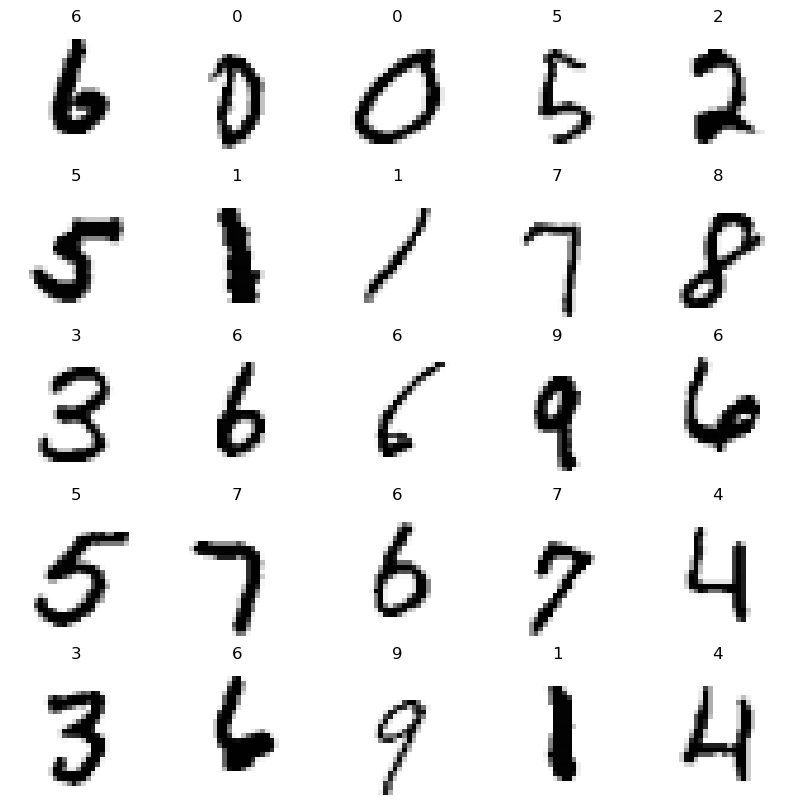

In [7]:
import matplotlib.pyplot as plt
import random

figs,axes = plt.subplots(5,5,figsize=(10,10))

for i in range(1,26):
    plt.subplot(5,5,i)
    idx=random.randint(0,m)
    img = x_train.loc[idx].values.reshape((28,28))
    plt.imshow(img,cmap='Greys')
    plt.title(y_train[idx])
    plt.axis('off')
# img

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential(
[
    tf.keras.Input(shape=(784,)),
    Dense(128,activation='relu',name='l1'),
    Dense(128,activation='relu',name='l2'),
    Dense(10,activation='linear',name='output')
])

In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [11]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 128)               100480    
                                                                 
 l2 (Dense)                  (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1050/1050 [==============================] - 4s 3ms/step - loss: 2.6492 - accuracy: 0.8515 - val_loss: 0.6718 - val_accuracy: 0.8965
Epoch 2/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4723 - accuracy: 0.9188 - val_loss: 0.3849 - val_accuracy: 0.9210
Epoch 3/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2674 - accuracy: 0.9404 - val_loss: 0.3504 - val_accuracy: 0.9231
Epoch 4/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2114 - accuracy: 0.9458 - val_loss: 0.2798 - val_accuracy: 0.9323
Epoch 5/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1683 - accuracy: 0.9541 - val_loss: 0.2621 - val_accuracy: 0.9457
Epoch 6/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1619 - accuracy: 0.9574 - val_loss: 0.2938 - val_accuracy: 0.9336
Epoch 7/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1405 - accuracy: 0.9610 - val_loss: 0.2502 - val_accuracy:

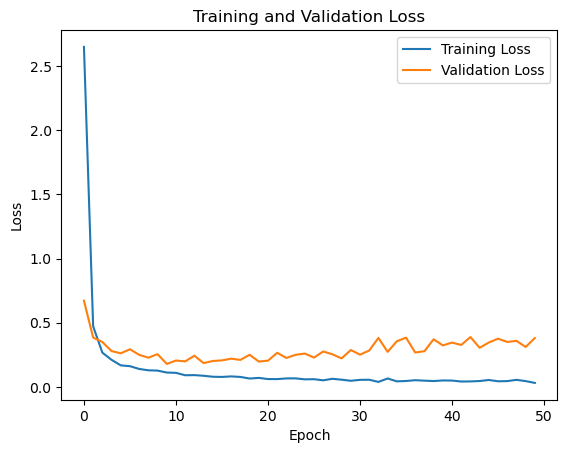

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

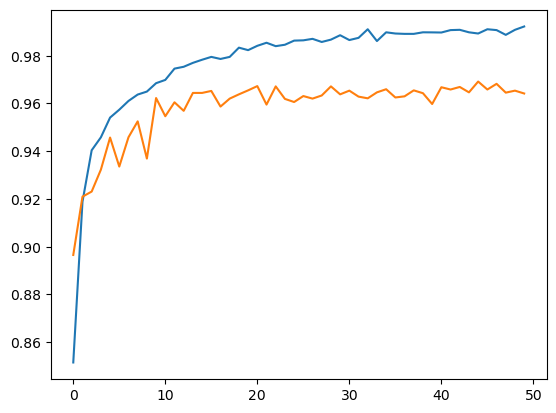

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [15]:
probability = model.predict(x_train)
# y_train

1313/1313 [==============================] - 2s 1ms/step


1/1 [==============================] - 0s 23ms/step


array([6], dtype=int64)

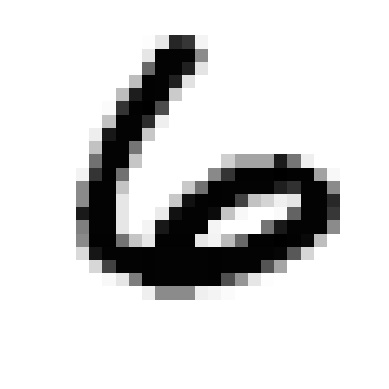

In [20]:
i=72
img = x_train.loc[i].values.reshape((28,28))
plt.imshow(img,cmap='Greys')
plt.axis('off')
prob = model.predict(x_train.iloc[i].to_numpy().reshape(1,-1))
y = prob.argmax(axis=1)
y

In [21]:
y_pred = probability.argmax(axis=1)
y_pred

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [22]:
max(history.history['accuracy'])

0.9922321438789368